# Custom Plotting Tutorial

This tutorial demonstrates how to create and customized map plots from the NetCDF-files produced during the QA4SM validation. The customization is done by varying different kinds of input parameters like title, label, font sizes, colormaps, value ranges, spatial extent and plot size. The customization can be executed for all relevant variables in the netcdf dataset as long as they are valid (Section 2).

The plotting uses a CustomPlotObject is which contains the two functions plot_map and display_metrics_and_datasets.
The display_metrics_and_datasets function is used to display the available metrics and datasets in the NetCDF file whereas the function plot_map provides the necessary plotting functionality.

The routine for the plot_map function looks like this:
plot_obj.plot_map(metric = 'R',
                  output_path = r"C:\Users\agruber\Desktop\tmp\custom_plots\plot_tests",
                  dataset_list = ['ERA5_LAND', 'C3S_combined'])

The inputs "metric", "output_path", and "dataset_list" are mandatory, all other plot parameters are optional, if omitted, a standardized plot like on the QA4SM website will be created.
In order to customize the plot the following parameters can be modified:

- colormap: Changes colormap of plot
- value_range: Changes the displayed value range of the variable of interest
- extent: Specifies the spatial extent of the plot
- title: Specifies the plot title
- title_fontsize: Specifies the fontsize of the title
- colorbar_label: Specifies the colorbar label title
- colorbar_ticks_fontsize: Changes the fontsize of the color bar value ticks
- xy_ticks_fontsize: Changes the fontsize of the lat lon labels of the map plot
- plotsize: Changes the overall figure size

Now follows a step by step demonstration of different custom plots.

Step 1:
Before you can start your plots execute the following cell once to install the necessary packages in your environment.

In [1]:
%pip install qa4sm-reader

Looking in indexes: https://pypi.geo.tuwien.ac.at/simple, https://pypi.org/simple
  Cloning https://github.com/ThoUnt96/qa4sm-reader.git to /tmp/pip-req-build-3ib3b0t2
  Running command git clone --filter=blob:none --quiet https://github.com/ThoUnt96/qa4sm-reader.git /tmp/pip-req-build-3ib3b0t2
  Resolved https://github.com/ThoUnt96/qa4sm-reader.git to commit bc30deffd51f76a9d7819e2b292a0fdec302ce1e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for qa4sm_reader: filename=qa4sm_reader-0.0.post1.dev571+gbc30deffd-py3-none-any.whl size=118334 sha256=c20d2bf298b0037c4100e4568b84af97e9a81983dfe3a766e34e046fc8feccfe
  Stored in directory: /tmp/pip-ephem-wheel-cache-nf1wp21r/wheels/b5/89/7c/a0fb4e69031662ae9fdb32a66163798faba471c240398e760b
Successfully built qa4sm_reader
  Attempting uninstall: qa4sm_reader
    Found existing installation: qa4sm_reader 0.0.post1.dev570+g18f403883
    Unin

Step 2: Load data and display valid metrics and datasets in the NetCDF data. Note that in order for this to work the NetCDF file must have its original name assigned during the QA4SM validation run!

In [2]:
from qa4sm_reader.custom_user_plot_generator import CustomPlotObject
import os

# Create Custom_Plot_object
dataset_name = "0-ERA5_LAND.swvl1_with_1-C3S_combined.sm.nc"
dataset_path = os.path.join(os.getcwd(), 'data', dataset_name)
output_path = os.path.join(os.getcwd(), 'output')
plot_obj = CustomPlotObject(dataset_path)
plot_obj.display_metrics_and_datasets()

The following metrics and datasets are available for this dataset:
Datasets: 
- ERA5_LAND
- C3S_combined
Metrics: 
- R: Pearson's r
- R_ci_lower: Pearson's r lower confidence interval
- R_ci_upper: Pearson's r upper confidence interval
- p_R: Pearson's r p-value
- RMSD: Root-mean-square deviation
- BIAS: Bias (difference of means)
- BIAS_ci_lower: Bias (difference of means) lower confidence interval
- BIAS_ci_upper: Bias (difference of means) upper confidence interval
- n_obs: # observations
- urmsd: Unbiased root-mean-square deviation
- urmsd_ci_lower: Unbiased root-mean-square deviation lower confidence interval
- urmsd_ci_upper: Unbiased root-mean-square deviation upper confidence interval
- RSS: Residual sum of squares
- mse: Mean square error
- mse_corr: Mean square error correlation
- mse_bias: Mean square error bias
- mse_var: Mean square error variance
- rho: Spearman's ρ
- rho_ci_lower: Spearman's ρ lower confidence interval
- p_rho: Spearman's ρ p-value
- status: Validation s

Step 3: Create default plot

In [3]:
plot_obj.plot_map(metric='R', output_dir=output_path, dataset_list=['ERA5_LAND', 'C3S_combined'])

/home/tunterho/anaconda3/lib/python3.12/site-packages/qa4sm_reader/globals.py:358: UserWarning: The dataset 'None' has not been specified in qa4sm_reader.globals. Set 'raise_error' to True to raise an exception for this case.
  warnings.warn(


Step 4: Customize colorbar and set custom Value Range.
Popular colorbar choices are:
viridis, plasma, inferno, magma, cividis, PiYG, PRGn, BrBG, PuOr, RdGy, RdBu, RdYlBu, RdYlGn, Spectral, coolwarm,
cividis. For further information regarding colormaps go to the respective website of matplotlib (https://matplotlib.org/stable/users/explain/colors/colormaps.html)

In [4]:
plot_obj.plot_map(metric='R', output_dir=output_path, dataset_list=['ERA5_LAND', 'C3S_combined'], colormap="viridis", value_range=(-0.5, 0.5))

/home/tunterho/anaconda3/lib/python3.12/site-packages/qa4sm_reader/globals.py:358: UserWarning: The dataset 'None' has not been specified in qa4sm_reader.globals. Set 'raise_error' to True to raise an exception for this case.
  warnings.warn(


Step 5: Change spatial extent of plot.
The extent is set as (lon_min, lon_max, lat_min, lat_max)

In [5]:
plot_obj.plot_map(metric='R', output_dir=output_path, dataset_list=['ERA5_LAND', 'C3S_combined'], colormap="viridis", extent=(-10, 20, 30, 40))

/home/tunterho/anaconda3/lib/python3.12/site-packages/qa4sm_reader/globals.py:358: UserWarning: The dataset 'None' has not been specified in qa4sm_reader.globals. Set 'raise_error' to True to raise an exception for this case.
  warnings.warn(


Step 6: Custom Title and Colorbar label and adjusted tick label sizes.

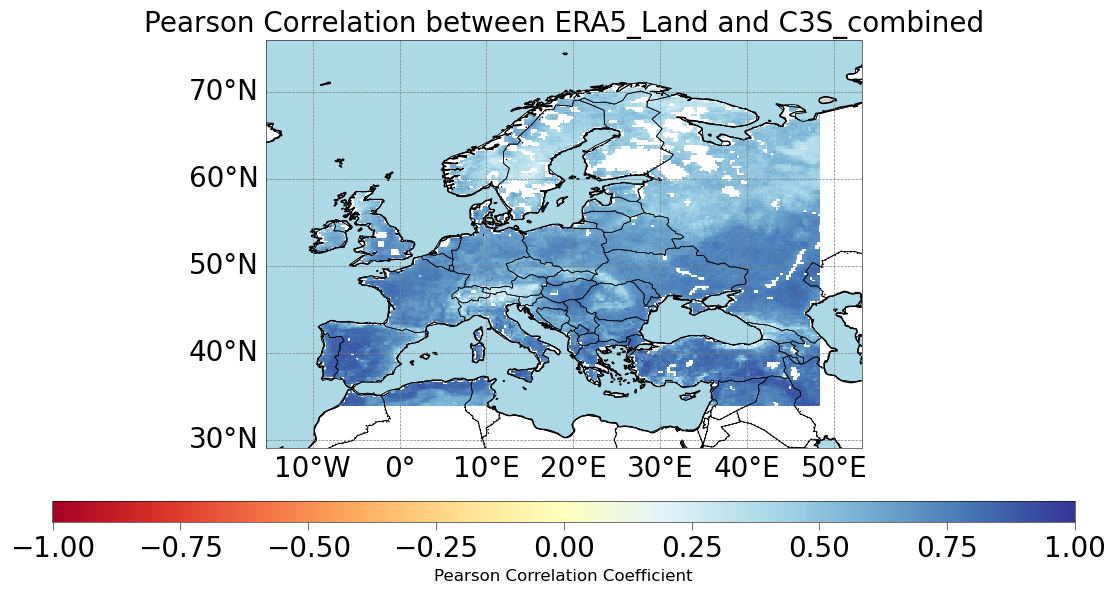

In [6]:
plot_obj.plot_map(metric='R', output_dir=output_path, dataset_list=['ERA5_LAND', 'C3S_combined'], title='Pearson Correlation between ERA5_Land and C3S_combined', title_fontsize=20,  colorbar_label='Pearson Correlation Coefficient', colorbar_ticks_fontsize=20,
xy_ticks_fontsize=20)

Step 7: Custom plot size

In [7]:
plot_obj.plot_map(metric='R', output_dir=output_path, dataset_list=['ERA5_LAND', 'C3S_combined'], plotsize=(20, 10))

/home/tunterho/anaconda3/lib/python3.12/site-packages/qa4sm_reader/globals.py:358: UserWarning: The dataset 'None' has not been specified in qa4sm_reader.globals. Set 'raise_error' to True to raise an exception for this case.
  warnings.warn(


Step 8: Special Case - Triple collocation variables (snr, beta, err_std)
Note that for those metrics only the dataset name of interest is passed to the dataset list as an input (e.g. "ISMN" for the snr-value of ISMN relative to the other datasets")!

In [8]:
# Create Custom_Plot_object
tc_dataset_name = "0-ISMN.soil_moisture_with_1-ERA5_LAND.swvl1_with_2-ESA_CCI_SM_passive.sm.nc"
tc_dataset_path = os.path.join(os.getcwd(), 'data', tc_dataset_name)
tc_plot_obj = CustomPlotObject(tc_dataset_path)
tc_plot_obj.display_metrics_and_datasets()

The following metrics and datasets are available for this dataset:
Datasets: 
- ISMN
- ERA5_LAND
- ESA_CCI_SM_passive
Metrics: 
- R: Pearson's r
- R_ci_lower: Pearson's r lower confidence interval
- R_ci_upper: Pearson's r upper confidence interval
- p_R: Pearson's r p-value
- RMSD: Root-mean-square deviation
- BIAS: Bias (difference of means)
- BIAS_ci_lower: Bias (difference of means) lower confidence interval
- BIAS_ci_upper: Bias (difference of means) upper confidence interval
- n_obs: # observations
- urmsd: Unbiased root-mean-square deviation
- urmsd_ci_lower: Unbiased root-mean-square deviation lower confidence interval
- urmsd_ci_upper: Unbiased root-mean-square deviation upper confidence interval
- RSS: Residual sum of squares
- mse: Mean square error
- mse_corr: Mean square error correlation
- mse_bias: Mean square error bias
- mse_var: Mean square error variance
- snr: Signal-to-noise ratio
- snr_ci_lower: Signal-to-noise ratio lower confidence interval
- snr_ci_upper: Signa

In [9]:
tc_plot_obj.plot_map(metric='snr', output_dir=output_path, dataset_list=['ISMN'], title='ISMN SNR relative to ERA5_LAND and ESA_CCI_SM_passive', title_fontsize=20, colorbar_label='SNR', colorbar_ticks_fontsize=20, xy_ticks_fontsize=20)